<a href="https://colab.research.google.com/github/mrymold/Final-Project/blob/main/INSE_6220_project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# use seaborn plotting style defaults
import seaborn as sns; sns.set()


In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Read the dataset**

In [ ]:

df = pd.read_excel('/content/drive/MyDrive/Dataset.xls', index_col=0)
##!pip install xlrd
##df = pd.read_excel('airquality.xls')
print(df.head())
     

                           X1  X2    X3    X4   X5     X6  X7    X8
chevrolet chevelle malibu   1  70  12.0  3504  130  307.0   8  18.0
buick skylark 320           1  70  11.5  3693  165  350.0   8  15.0
plymouth satellite          1  70  11.0  3436  150  318.0   8  18.0
amc rebel sst               1  70  12.0  3433  150  304.0   8  16.0
ford torino                 1  70  10.5  3449  140  302.0   8  17.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#m,n=df.shape #size of data
#X = df.ix[:,0:n].values # Feature matrix
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X) #normalize data
     
     

In [ ]:
#normalize data
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      392 non-null    float64
 1   X2      392 non-null    float64
 2   X3      392 non-null    float64
 3   X4      392 non-null    float64
 4   X5      392 non-null    float64
 5   X6      392 non-null    float64
 6   X7      392 non-null    float64
 7   X8      392 non-null    float64
dtypes: float64(8)
memory usage: 27.6+ KB


**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Data Visualisation**

<Axes: >

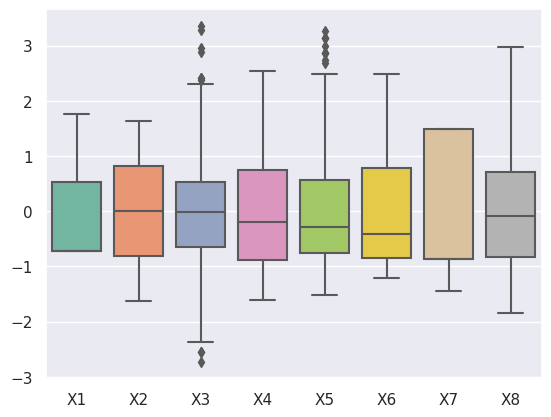

In [ ]:
sns.boxplot(data=df, orient="v", palette="Set2")


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 94.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 51.

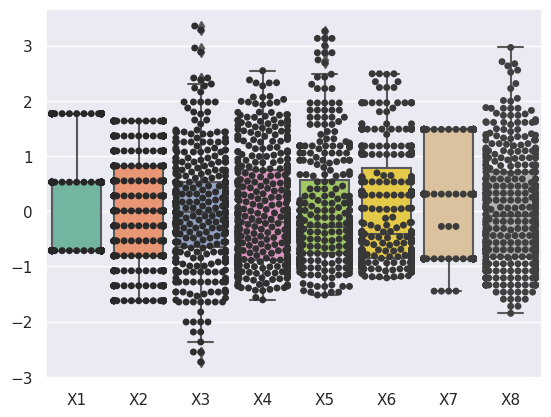

In [ ]:
##Use swarmplot() to show the datapoints on top of the boxes:
#plt. figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.swarmplot(data=df, color=".25") 

**Exploratory Data Analysis**

sns.pairplot is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

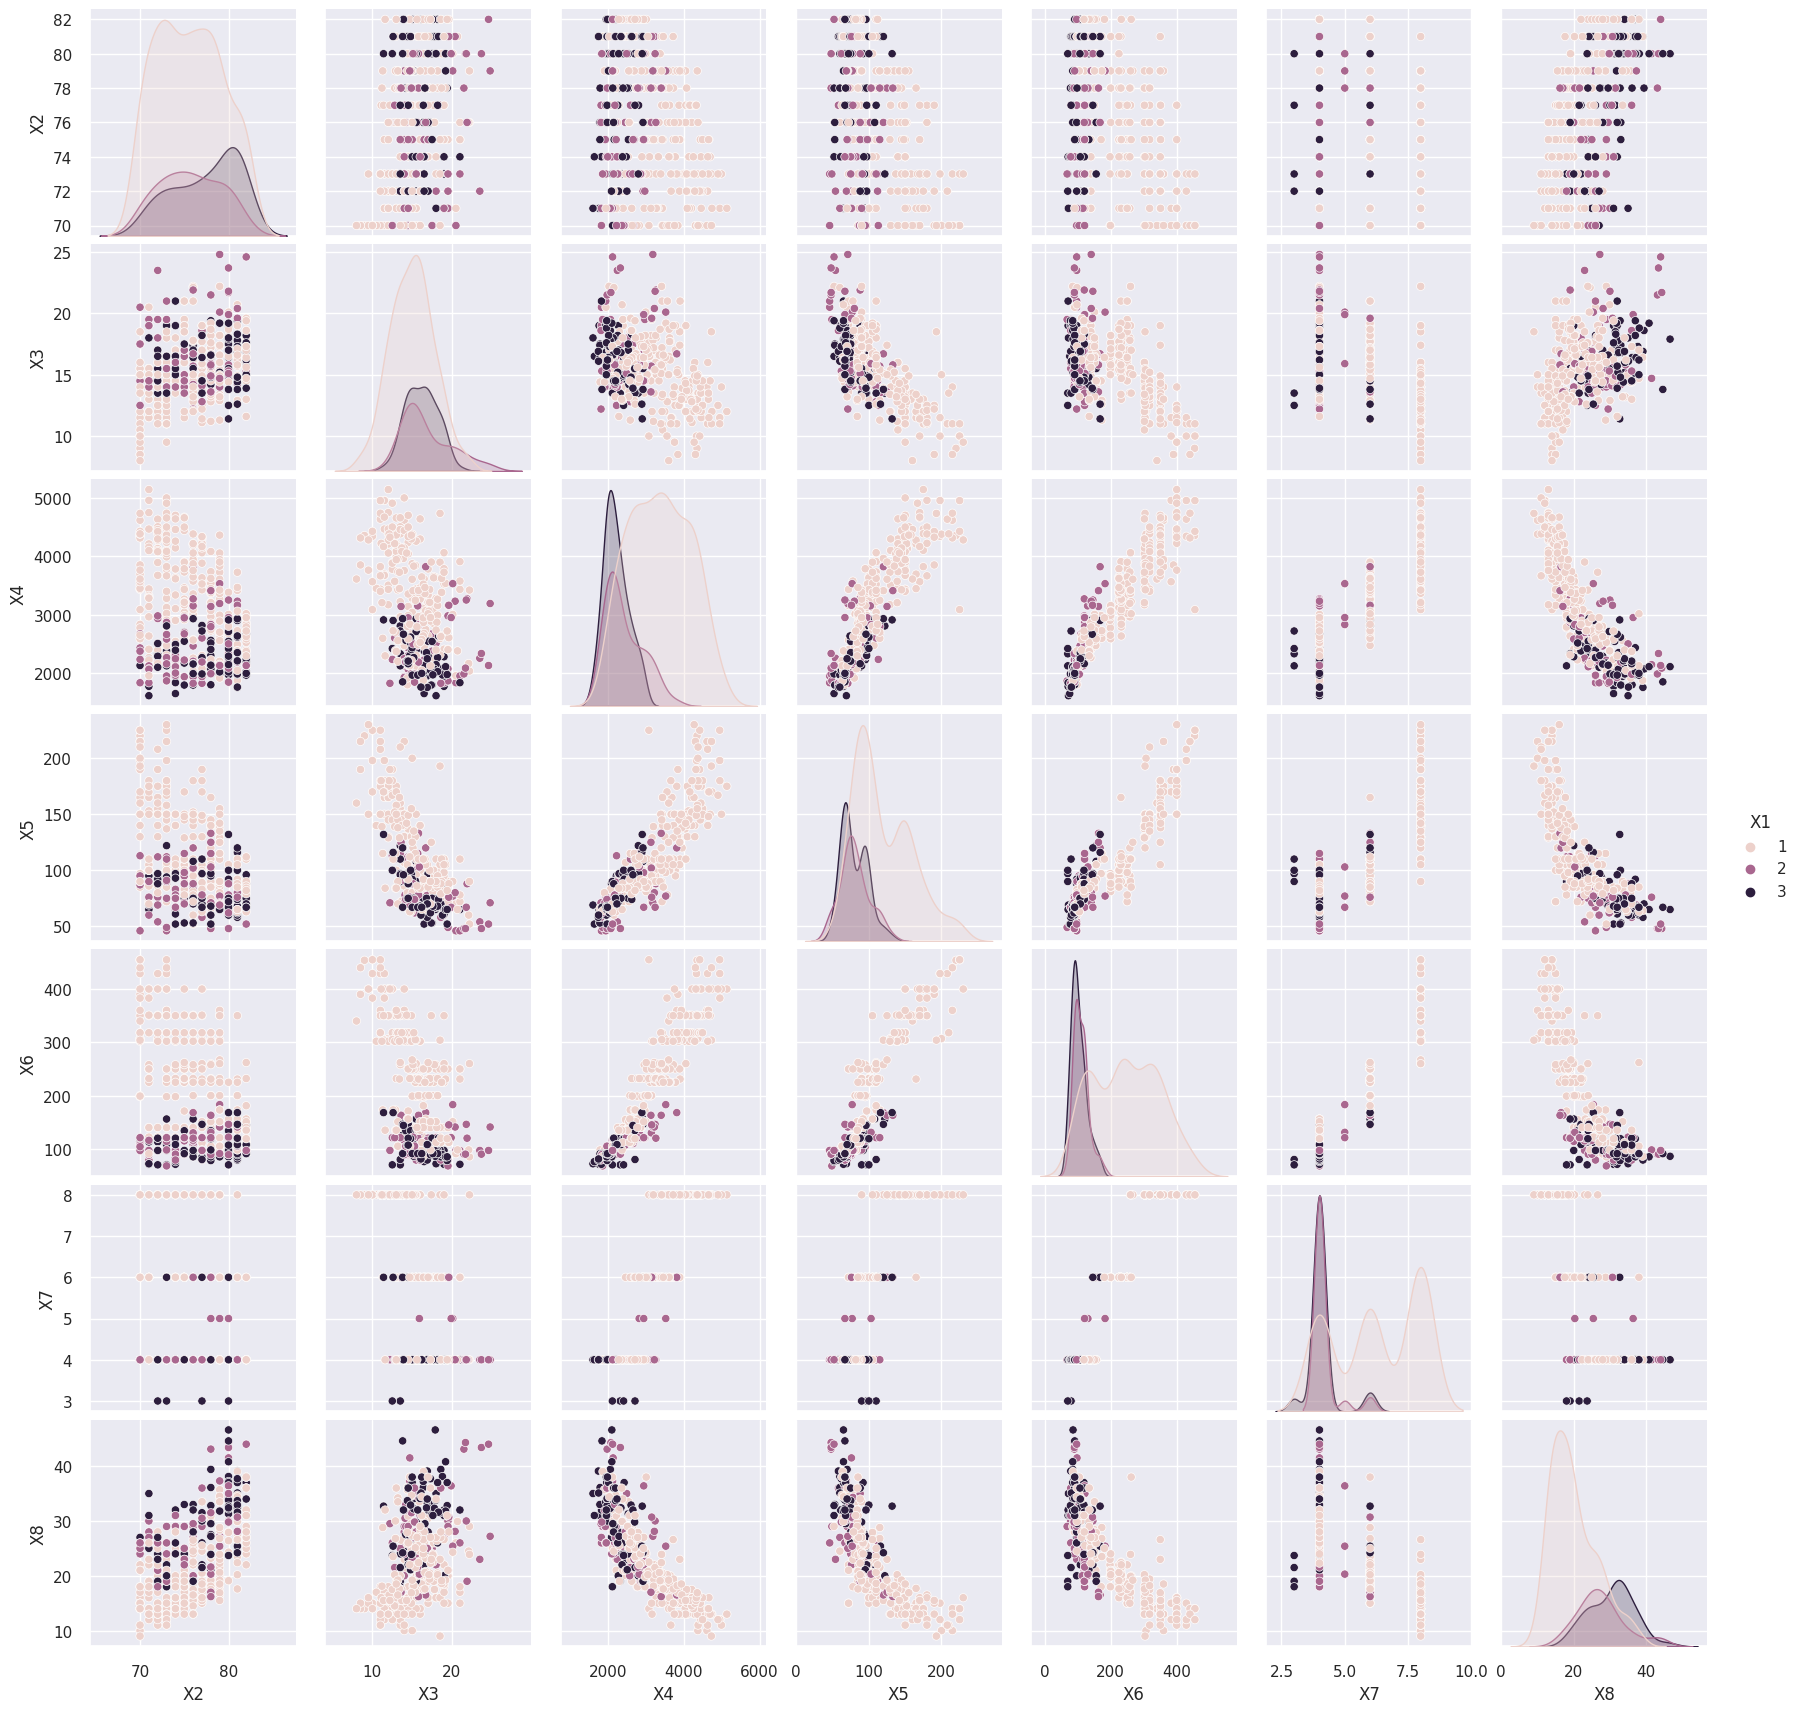

In [ ]:
sns.pairplot(df, hue='X1')
plt.show()

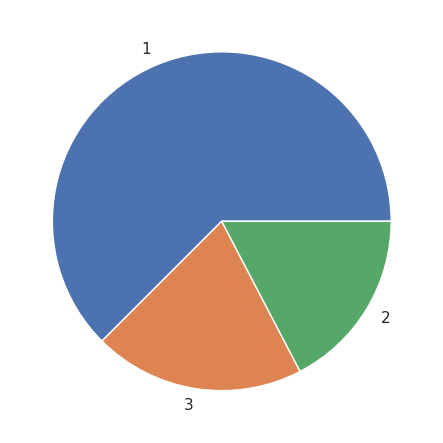

In [ ]:
y =df['X1']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()
     

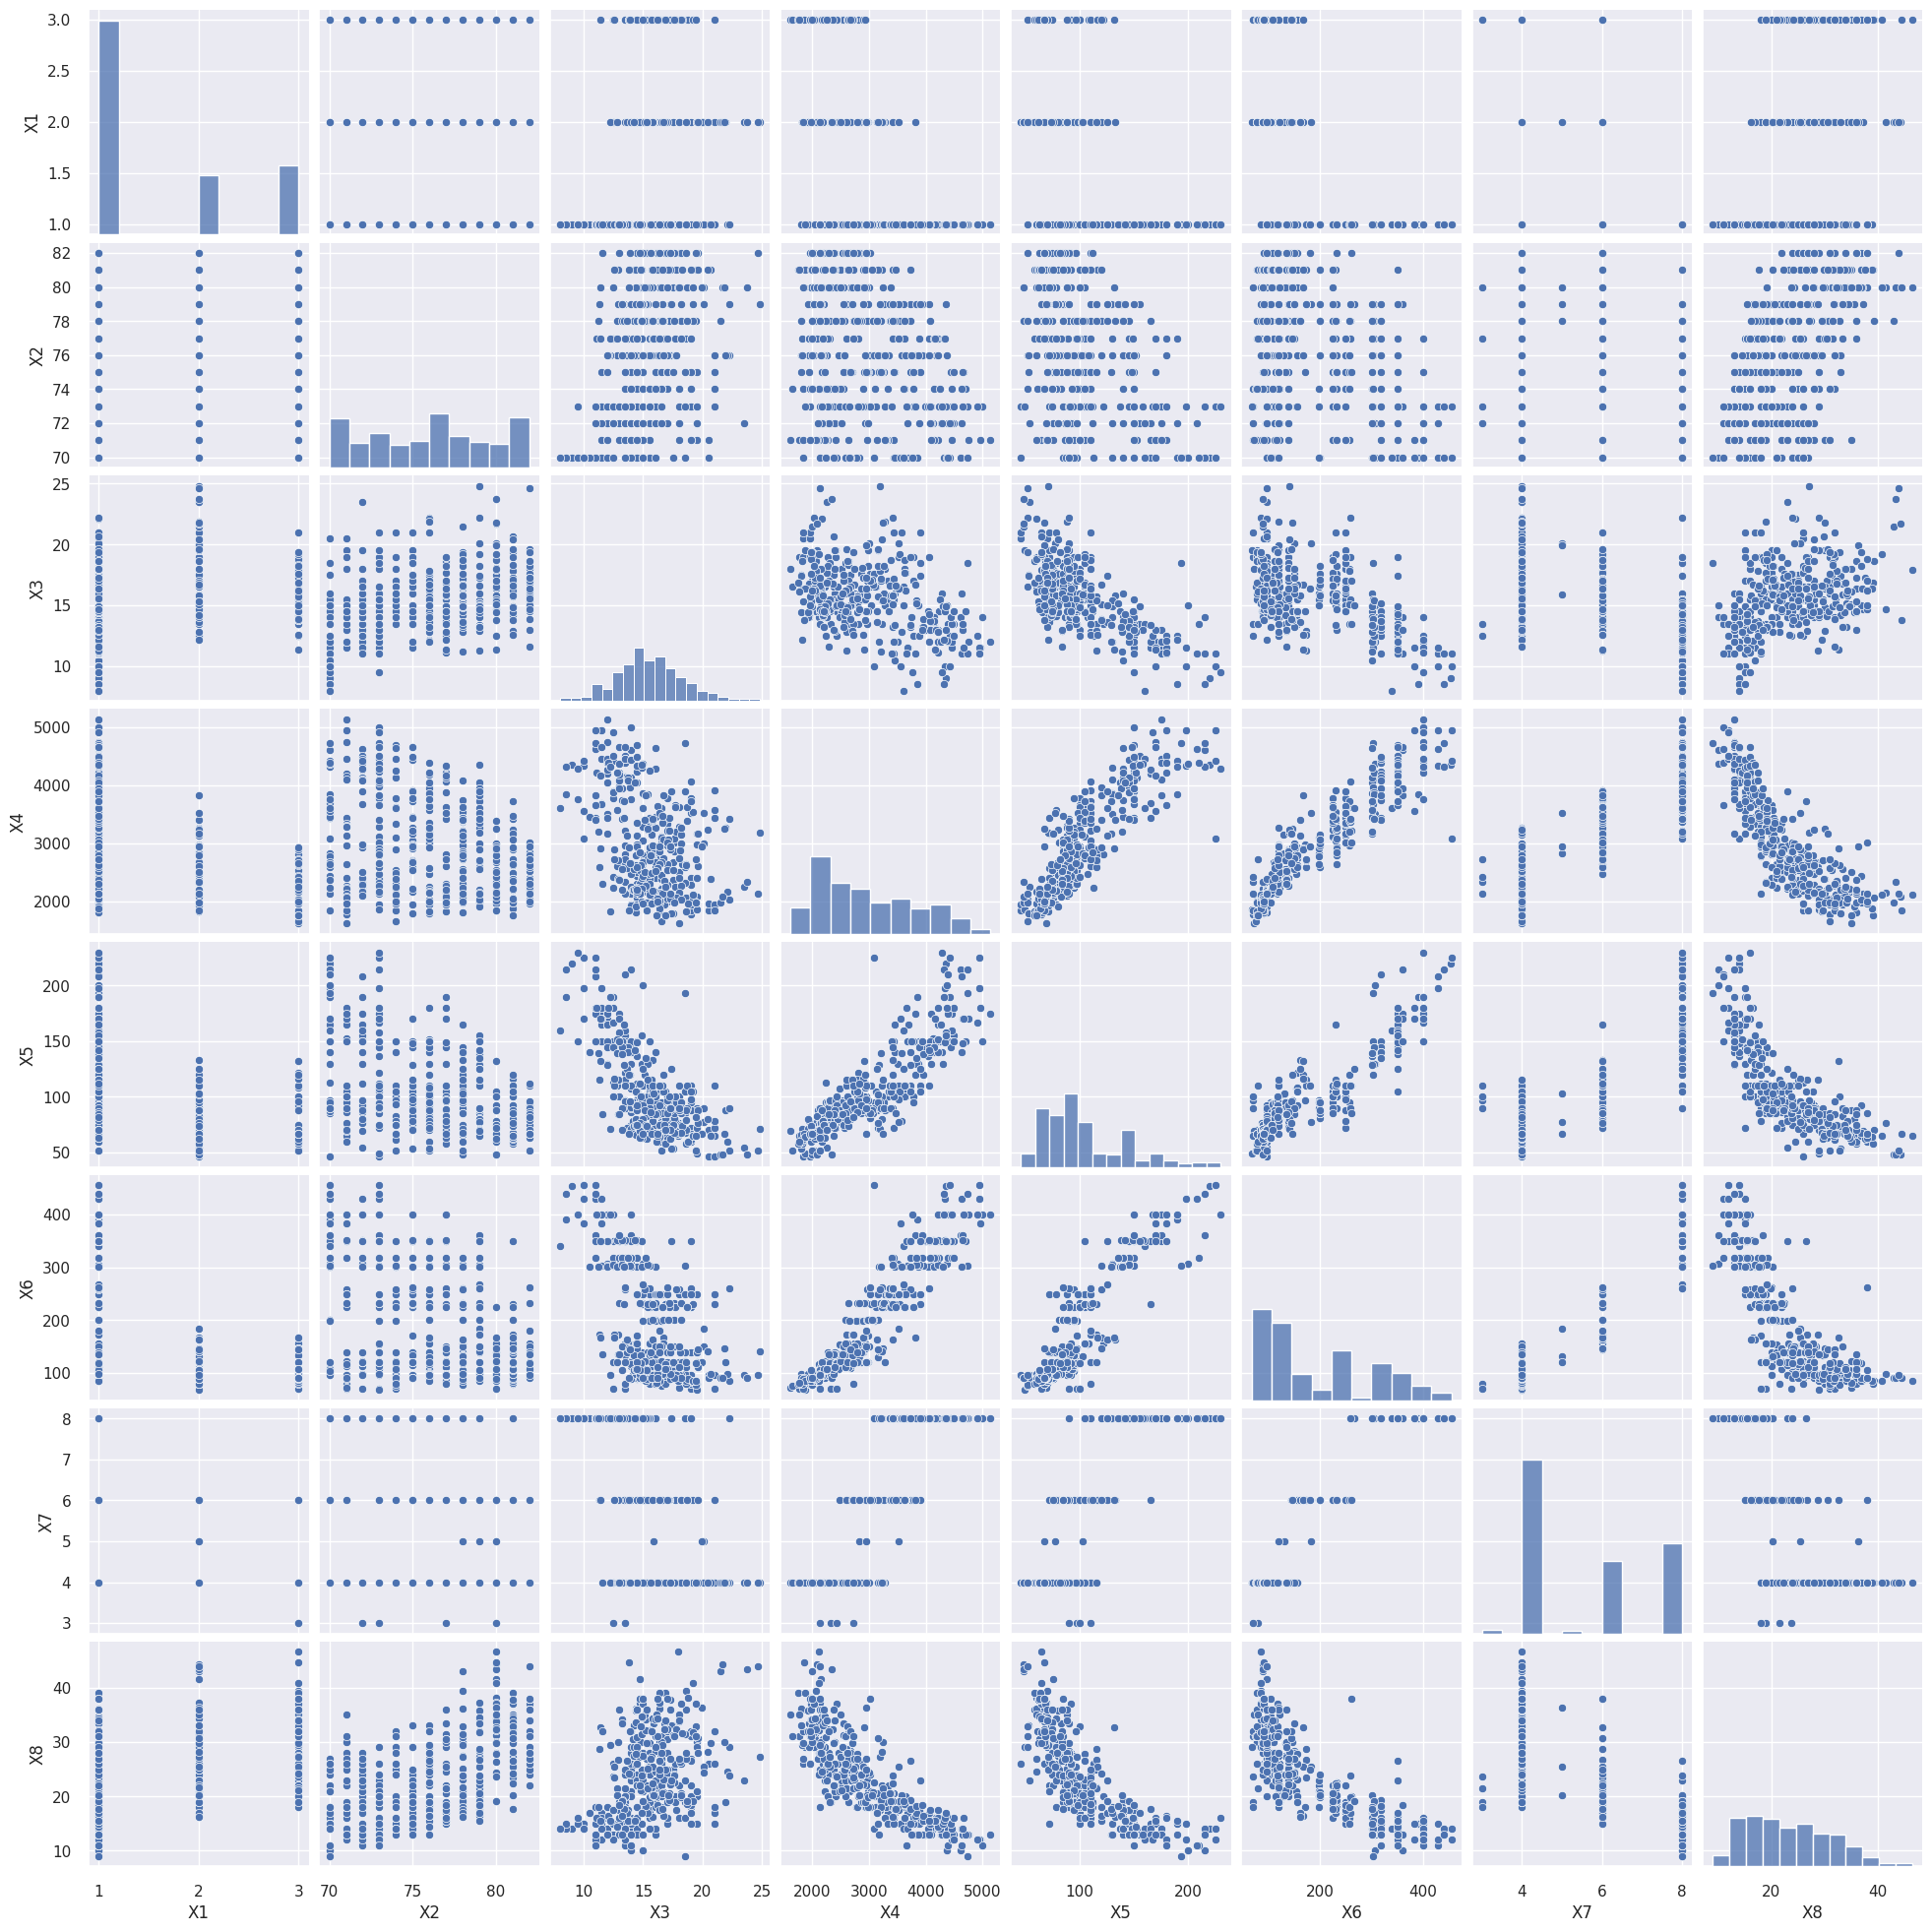

In [ ]:
#pairplot
sns.pairplot(df)

**Data Matrix**

In [ ]:
X = df.drop(columns=['X1'])
X.head(10)

,X2,X3,X4,X5,X6,X7,X8
chevrolet chevelle malibu,-1.623241,-1.283618,0.619748,0.663285,1.075915,1.482053,-0.697747
buick skylark 320,-1.623241,-1.464852,0.842258,1.572585,1.486832,1.482053,-1.082115
plymouth satellite,-1.623241,-1.646086,0.539692,1.182885,1.181033,1.482053,-0.697747
amc rebel sst,-1.623241,-1.283618,0.536160,1.182885,1.047246,1.482053,-0.953992
ford torino,-1.623241,-1.827320,0.554997,0.923085,1.028134,1.482053,-0.825870
ford galaxie 500,-1.623241,-2.008554,1.605147,2.429924,2.241772,1.482053,-1.082115
chevrolet impala,-1.623241,-2.371022,1.620452,3.001484,2.480677,1.482053,-1.210238
plymouth fury iii,-1.623241,-2.552256,1.571005,2.871584,2.346890,1.482053,-1.210238
pontiac catalina,-1.623241,-2.008554,1.704040,3.131384,2.490234,1.482053,-1.210238
amc ambassador dpl,-1.623241,-2.552256,1.027093,2.222085,1.869080,1.482053,-1.082115


**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

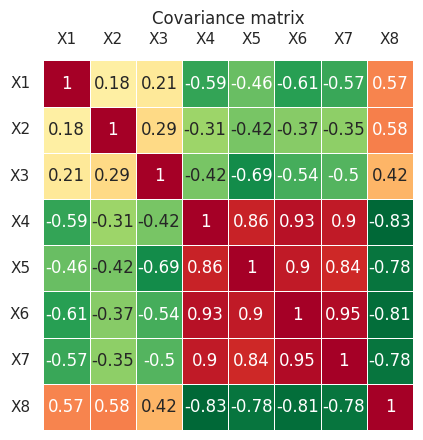

In [ ]:
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Covariance matrix')

Applying PCA (Principal component analysis)

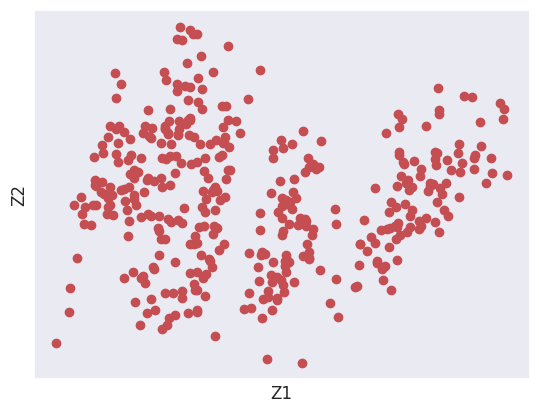

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.xticks([], []) # remove x-axis tick labels
plt.yticks([], []) # remove y-axis tick labels
plt.show()

**Eigenvectors**

In [ ]:
X = np.array([23, 4, 29, 44, 47, 24, 40, 23, 23, 44, 33, 27, 60, 46, 61, 11, 23, 62, 31, 44, 77, 14, 65, 42])
#X = np.array([99, 85, 86, 71, 82, 95, 108, 87, 89, 89, 78, 86])
#X = np.array([12, 12, 12, 14, 15, 16, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 20, 
#              20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 23, 23, 24, 24, 25, 26, 26, 28, 28, 28])			  
#X = np.random.poisson(35, 15)

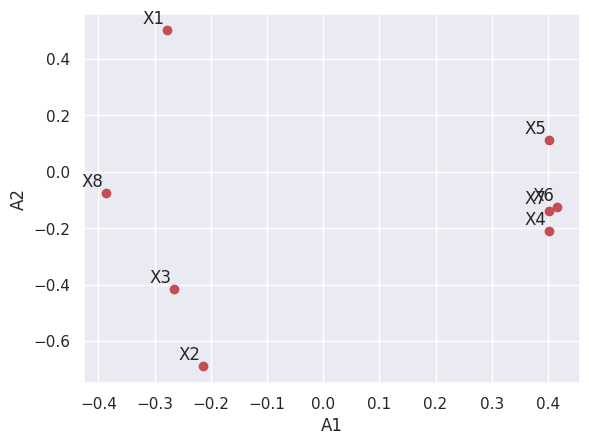

In [ ]:
A = pca.components_.T 
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


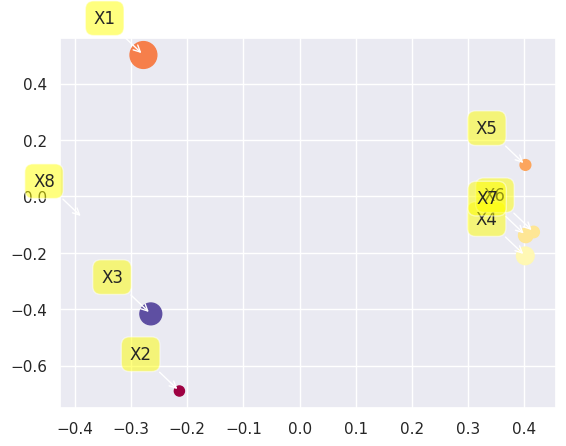

In [ ]:
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
     

**Scree plot**

Text(0, 0.5, 'Explained variance')

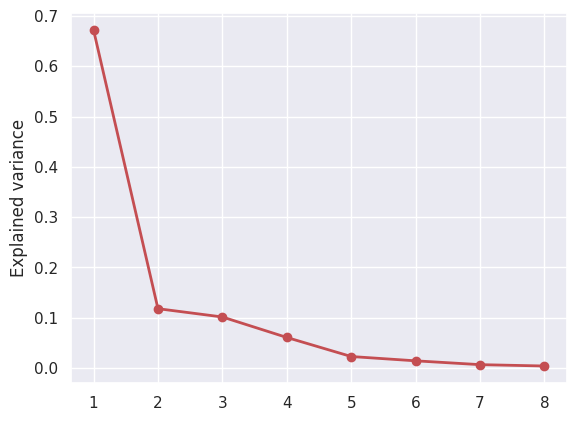

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
#plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explaiend Variance**

Text(0, 0.5, 'Cumulative explained variance')

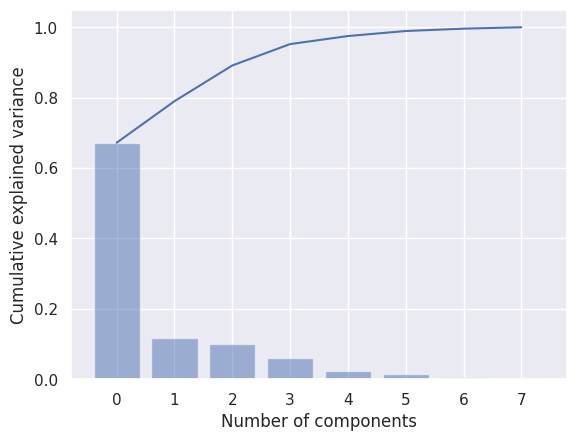

In [ ]:
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
     

**Biplot**

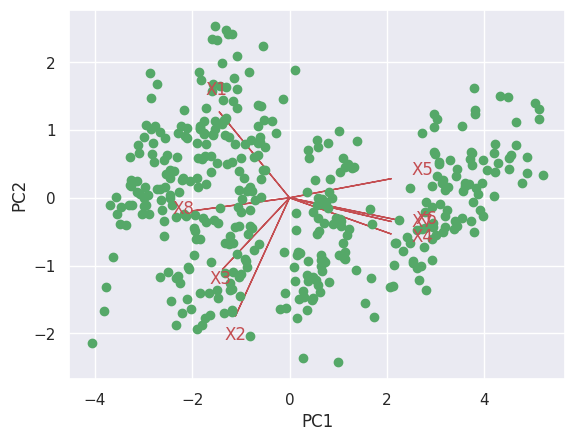

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
   # plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

**Principal components**

Text(0.5, 1.0, 'Principal components')

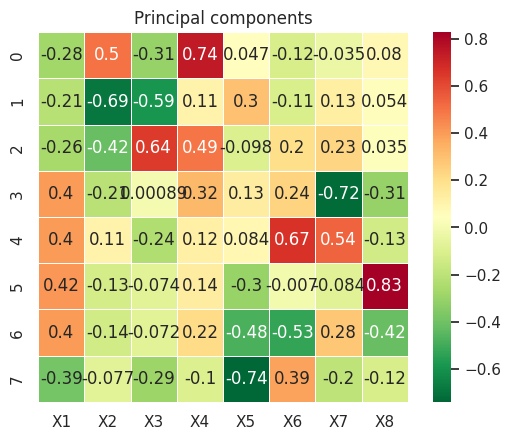

In [ ]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('Principal components')
     

**Using PCA Library**


In [ ]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [61]:
#from pca import pca
# Initialize and keep all PCs
#model =pca()
# Fit transform
#out =model.fit_transform(X)


In [ ]:
out['PC']

Install Pycaret

In [38]:
# install slim version (default): if you get an error message, run it again:
!pip3 install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
 

In [44]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.0.0'

**Before Applying PCA**

In [66]:
data = df.sample(frac=0.8, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (314, 9)
Unseen Data For Predictions: (78, 9)


In [68]:
from pycaret.classification import *
clf = setup(data=data, target='X1', train_size=0.8, session_id=123)

,Description,Value
0,Session id,123
1,Target,X1
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(314, 9)"
5,Transformed data shape,"(314, 9)"
6,Transformed train set shape,"(251, 9)"
7,Transformed test set shape,"(63, 9)"
8,Numeric features,7
9,Categorical features,1


**Comparing All Models ## before ## applying PCA**

In [69]:
#show the best model and their statistics
#comparison among classification models before applying PCA
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8214,0.9428,0.8214,0.8365,0.8204,0.6629,0.6690,0.6150
gbc,Gradient Boosting Classifier,0.8089,0.9402,0.8089,0.8249,0.8101,0.6435,0.6496,0.8570
ada,Ada Boost Classifier,0.8049,0.9151,0.8049,0.8242,0.8048,0.6420,0.6495,0.6020
xgboost,Extreme Gradient Boosting,0.8011,0.9383,0.8011,0.8098,0.7991,0.6207,0.6277,0.3130
dt,Decision Tree Classifier,0.7969,0.8324,0.7969,0.7999,0.7924,0.6192,0.6241,0.3440
rf,Random Forest Classifier,0.7932,0.9410,0.7932,0.7989,0.7887,0.6104,0.6172,0.5560
et,Extra Trees Classifier,0.7774,0.9342,0.7774,0.7759,0.7670,0.5762,0.5877,0.6100
lr,Logistic Regression,0.7412,0.9251,0.7412,0.7269,0.7286,0.5058,0.5115,0.7840
qda,Quadratic Discriminant Analysis,0.7252,0.9100,0.7252,0.7676,0.7208,0.5036,0.5262,0.2840
lda,Linear Discriminant Analysis,0.7214,0.9127,0.7214,0.7331,0.7112,0.4810,0.4956,0.3630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

#read cvs file into dataframe
df = pd.read_excel('/content/drive/MyDrive/Dataset.xls')
df.head(25)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8
0,chevrolet chevelle malibu,1,70,12.0,3504,130,307.0,8,18.0
1,buick skylark 320,1,70,11.5,3693,165,350.0,8,15.0
2,plymouth satellite,1,70,11.0,3436,150,318.0,8,18.0
3,amc rebel sst,1,70,12.0,3433,150,304.0,8,16.0
4,ford torino,1,70,10.5,3449,140,302.0,8,17.0
5,ford galaxie 500,1,70,10.0,4341,198,429.0,8,15.0
6,chevrolet impala,1,70,9.0,4354,220,454.0,8,14.0
7,plymouth fury iii,1,70,8.5,4312,215,440.0,8,14.0
8,pontiac catalina,1,70,10.0,4425,225,455.0,8,14.0
9,amc ambassador dpl,1,70,8.5,3850,190,390.0,8,15.0


Setting up the Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
#For Google Colab only
#from pycaret.utils import enable_colab 
#enable_colab()

**Classification + PCA**

In [46]:
from pycaret.classification import *
clf_pca = setup(data=df, target='X1', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,X1
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(392, 9)"
5,Transformed data shape,"(392, 4)"
6,Transformed train set shape,"(274, 4)"
7,Transformed test set shape,"(118, 4)"
8,Numeric features,7
9,Categorical features,1


**After applying PCA**

In [47]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7197,0.8821,0.7197,0.7022,0.7045,0.4693,0.4769,0.7130
lda,Linear Discriminant Analysis,0.7122,0.8781,0.7122,0.7057,0.7006,0.4548,0.4639,0.2010
rf,Random Forest Classifier,0.6975,0.8691,0.6975,0.6932,0.6889,0.4190,0.4243,0.5480
ridge,Ridge Classifier,0.6828,0.0000,0.6828,0.6316,0.6269,0.3154,0.3490,0.3140
et,Extra Trees Classifier,0.6795,0.8636,0.6795,0.6782,0.6735,0.3950,0.3992,0.8740
qda,Quadratic Discriminant Analysis,0.6790,0.8608,0.6790,0.6811,0.6534,0.4193,0.4505,0.1940
xgboost,Extreme Gradient Boosting,0.6757,0.8481,0.6757,0.6908,0.6706,0.3884,0.3970,0.3030
knn,K Neighbors Classifier,0.6721,0.8446,0.6721,0.6427,0.6438,0.3517,0.3636,0.1950
nb,Naive Bayes,0.6717,0.8552,0.6717,0.6563,0.6525,0.3849,0.3997,0.1930
svm,SVM - Linear Kernel,0.6681,0.0000,0.6681,0.6301,0.6302,0.3506,0.3807,0.3210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Tune the Best Model

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.9280,0.7500,0.6655,0.7051,0.4896,0.5006
1,0.6786,0.8602,0.6786,0.6810,0.6786,0.4207,0.4217
2,0.6429,0.8344,0.6429,0.6680,0.6526,0.3736,0.3762
3,0.6071,0.7929,0.6071,0.6375,0.6186,0.3246,0.3277
4,0.7407,0.8444,0.7407,0.7520,0.7451,0.5263,0.5278
5,0.6667,0.9031,0.6667,0.6444,0.6330,0.3193,0.3341
6,0.8148,0.9199,0.8148,0.8219,0.8086,0.6538,0.6607
7,0.7037,0.8785,0.7037,0.6699,0.6821,0.4098,0.4156
8,0.7037,0.8949,0.7037,0.6029,0.6481,0.4098,0.4259


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.9311,0.7500,0.6655,0.7051,0.4896,0.5006
1,0.6429,0.8553,0.6429,0.6680,0.6526,0.3736,0.3762
2,0.6429,0.8312,0.6429,0.6680,0.6526,0.3736,0.3762
3,0.6429,0.8042,0.6429,0.6566,0.6487,0.3708,0.3717
4,0.7037,0.8518,0.7037,0.6949,0.6976,0.4404,0.4416
5,0.6667,0.8957,0.6667,0.6444,0.6330,0.3193,0.3341
6,0.8148,0.9182,0.8148,0.8219,0.8086,0.6538,0.6607
7,0.7037,0.8747,0.7037,0.6699,0.6821,0.4098,0.4156
8,0.7407,0.9074,0.7407,0.6360,0.6831,0.4836,0.5026


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune a Model: How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

Tune Logistic Regression Model

In [51]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.9280,0.7500,0.6655,0.7051,0.4896,0.5006
1,0.6786,0.8602,0.6786,0.6810,0.6786,0.4207,0.4217
2,0.6429,0.8344,0.6429,0.6680,0.6526,0.3736,0.3762
3,0.6071,0.7929,0.6071,0.6375,0.6186,0.3246,0.3277
4,0.7407,0.8444,0.7407,0.7520,0.7451,0.5263,0.5278
5,0.6667,0.9031,0.6667,0.6444,0.6330,0.3193,0.3341
6,0.8148,0.9199,0.8148,0.8219,0.8086,0.6538,0.6607
7,0.7037,0.8785,0.7037,0.6699,0.6821,0.4098,0.4156
8,0.7037,0.8949,0.7037,0.6029,0.6481,0.4098,0.4259


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

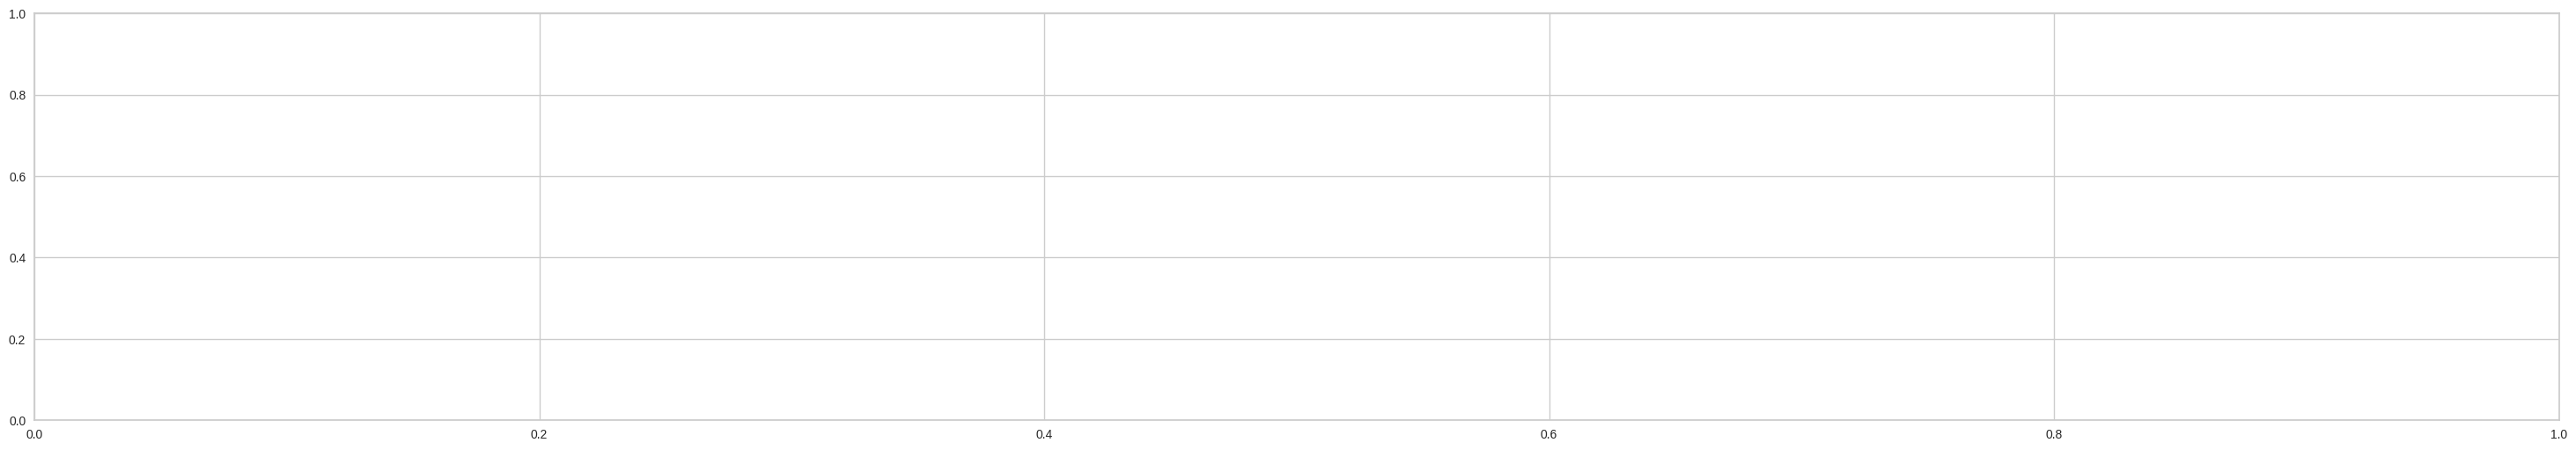

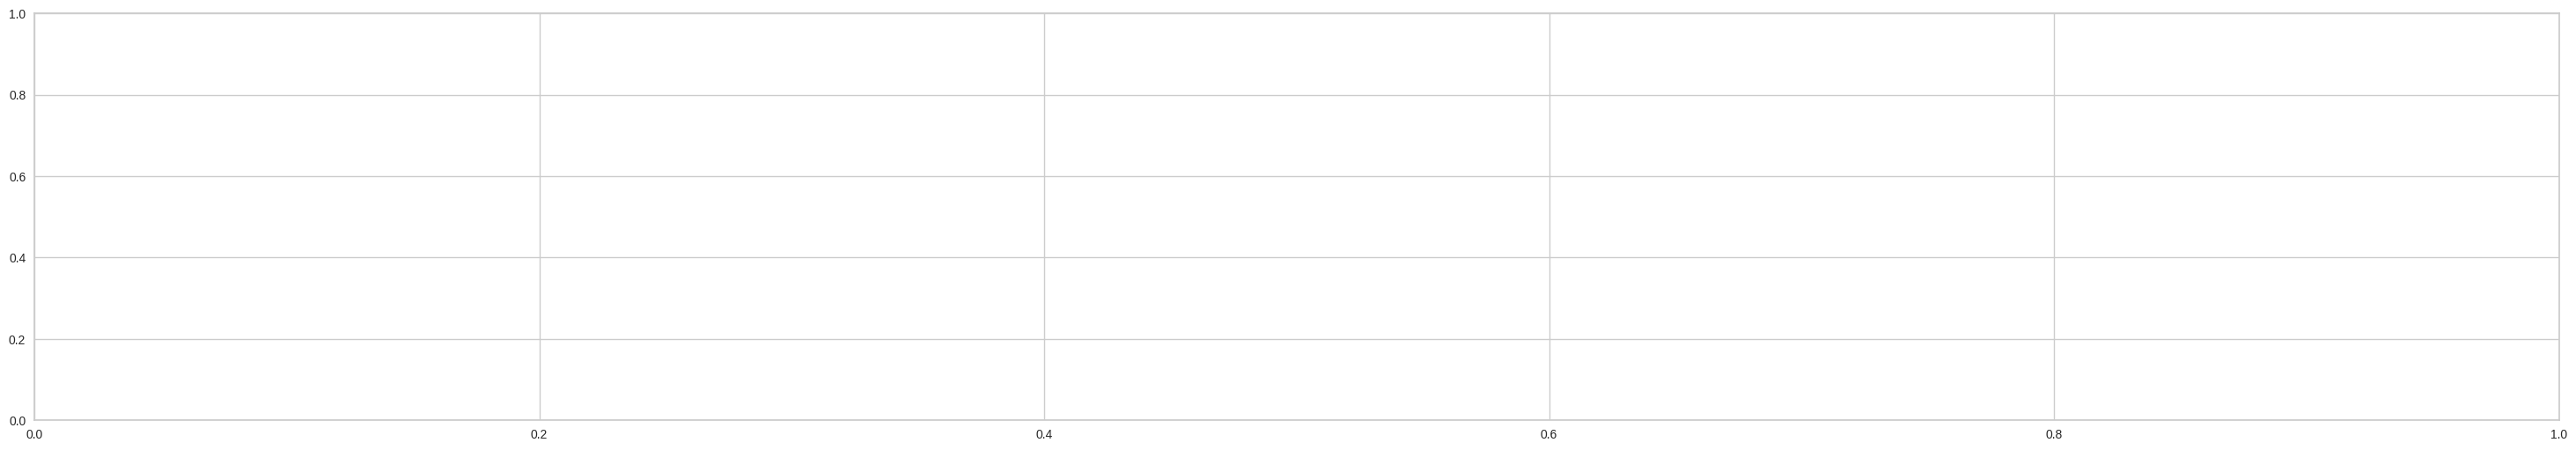

In [52]:
evaluate_model(tuned_lr)

**Create Linear Discriminant Analysis Model**

In [53]:
lda=create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.9377,0.7500,0.6772,0.7098,0.5063,0.5161
1,0.6429,0.8438,0.6429,0.7090,0.6637,0.4055,0.4176
2,0.6786,0.8228,0.6786,0.7054,0.6833,0.4375,0.4445
3,0.6429,0.7912,0.6429,0.6566,0.6487,0.3708,0.3717
4,0.6667,0.8508,0.6667,0.6502,0.6571,0.3520,0.3532
5,0.6667,0.8797,0.6667,0.6444,0.6330,0.3193,0.3341
6,0.7407,0.9205,0.7407,0.7407,0.7407,0.5154,0.5154
7,0.6667,0.8620,0.6667,0.6360,0.6481,0.3361,0.3398
8,0.7778,0.9279,0.7778,0.7412,0.7397,0.5263,0.5568


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Linear Discriminant Analysis Model**

In [55]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.9377,0.7500,0.6772,0.7098,0.5063,0.5161
1,0.6429,0.8438,0.6429,0.7090,0.6637,0.4055,0.4176
2,0.6786,0.8228,0.6786,0.7054,0.6833,0.4375,0.4445
3,0.6071,0.7928,0.6071,0.6371,0.6192,0.3260,0.3285
4,0.6667,0.8508,0.6667,0.6502,0.6571,0.3520,0.3532
5,0.6667,0.8780,0.6667,0.6444,0.6330,0.3193,0.3341
6,0.7407,0.9205,0.7407,0.7407,0.7407,0.5154,0.5154
7,0.6667,0.8620,0.6667,0.6360,0.6481,0.3361,0.3398
8,0.8148,0.9279,0.8148,0.7759,0.7796,0.6186,0.6403


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Linear Discriminant Analysis**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

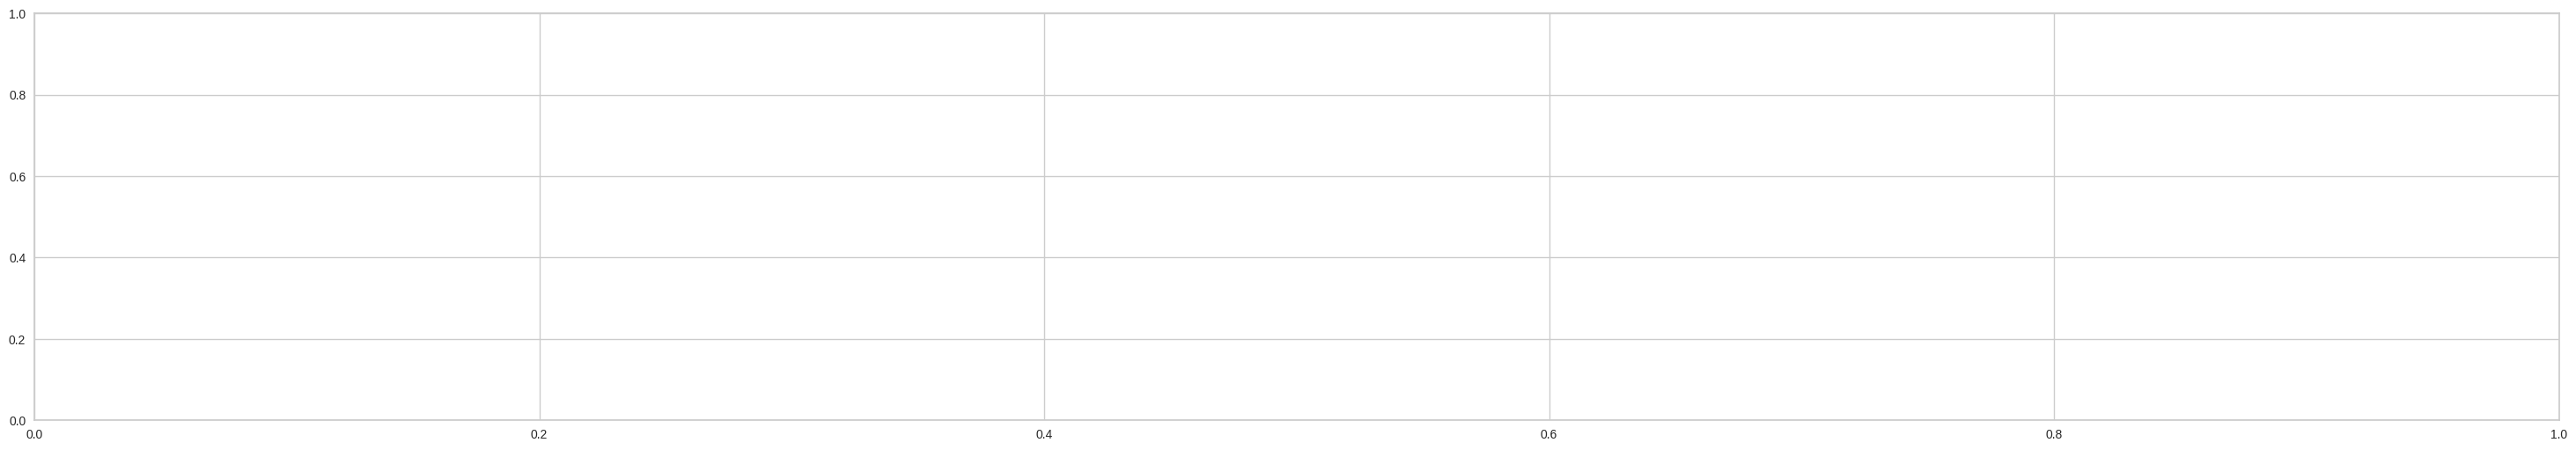

In [56]:
evaluate_model(tuned_lda)

**Create Random Forest Classifier Model**

In [57]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.9113,0.7857,0.7824,0.7822,0.5768,0.5786
1,0.6071,0.8436,0.6071,0.5863,0.5958,0.2701,0.2709
2,0.6786,0.8540,0.6786,0.7082,0.6901,0.4486,0.4520
3,0.6071,0.8426,0.6071,0.5899,0.5946,0.2684,0.2705
4,0.6296,0.8260,0.6296,0.6417,0.6214,0.2663,0.2722
5,0.7037,0.8421,0.7037,0.7213,0.7112,0.4613,0.4627
6,0.7037,0.8837,0.7037,0.6914,0.6961,0.4286,0.4300
7,0.7407,0.8539,0.7407,0.7346,0.7266,0.4661,0.4792
8,0.6667,0.8923,0.6667,0.6349,0.6323,0.2895,0.3062


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Classifier Model**

In [58]:
tuned_rf_pca = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8878,0.7143,0.6952,0.6911,0.4167,0.4260
1,0.6786,0.8510,0.6786,0.6942,0.6835,0.4324,0.4354
2,0.7500,0.8510,0.7500,0.7723,0.7566,0.5586,0.5624
3,0.6786,0.8038,0.6786,0.5561,0.6112,0.3455,0.3723
4,0.6296,0.7448,0.6296,0.6019,0.6138,0.2969,0.3001
5,0.6667,0.8470,0.6667,0.6481,0.6483,0.3622,0.3692
6,0.7778,0.8980,0.7778,0.8212,0.7449,0.5574,0.5793
7,0.7407,0.8465,0.7407,0.7892,0.7381,0.5000,0.5101
8,0.6667,0.9061,0.6667,0.6349,0.6360,0.2895,0.3051


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Random Forest Classifier  Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

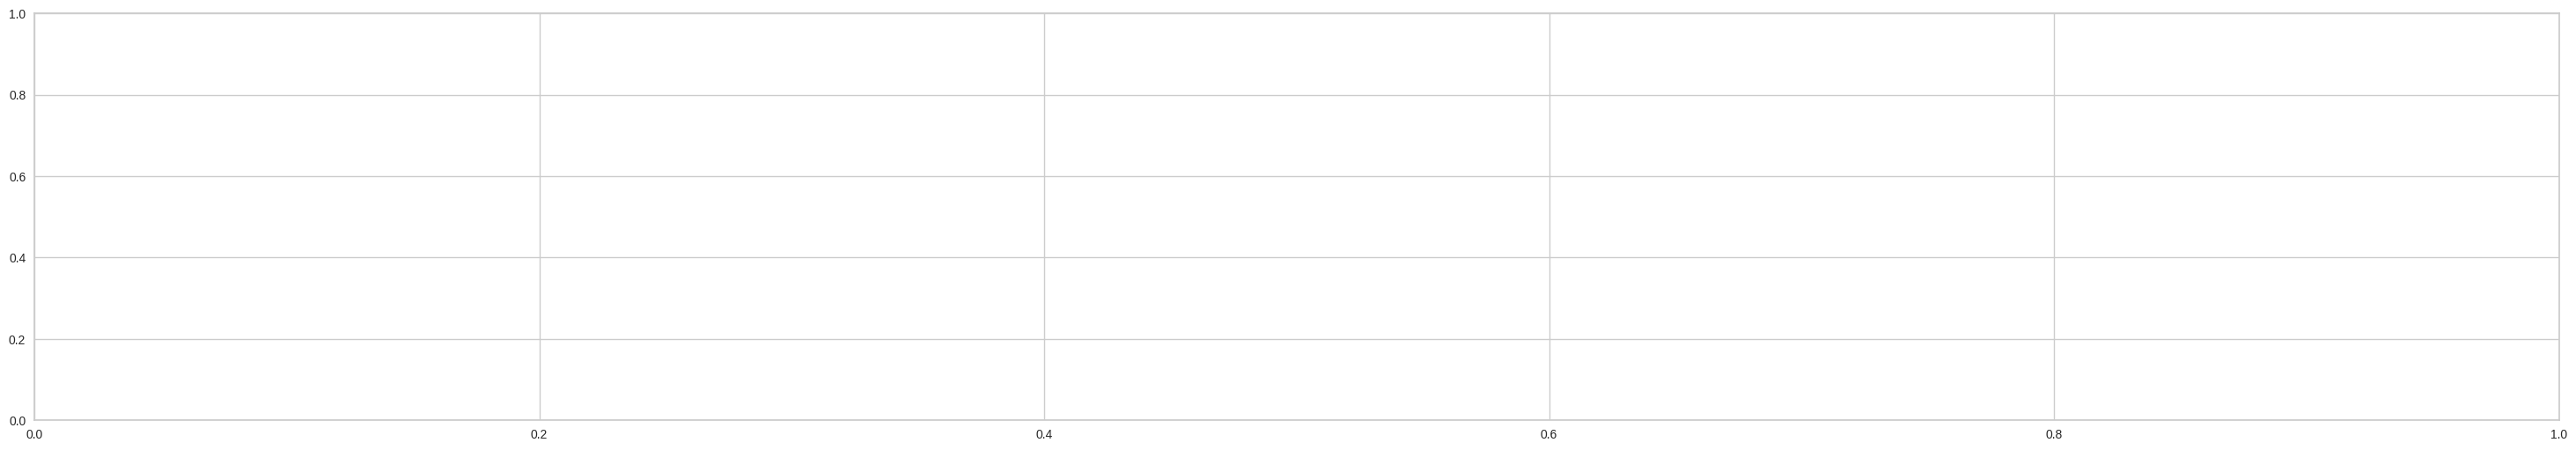

In [59]:
evaluate_model(tuned_rf_pca)

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

Explainable AI with Shapley values

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

**Explainable AI with Shapley values**



Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [ ]:
pip install shap pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


SHAP Summary Plot



Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

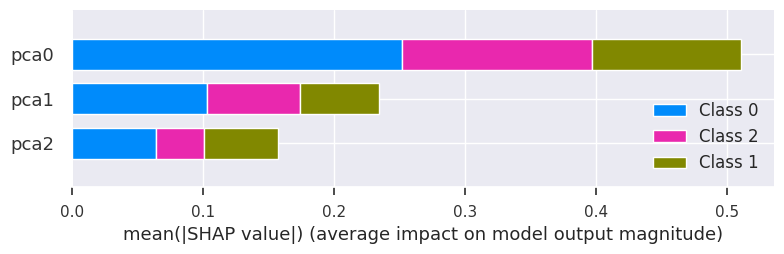

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

Visualize a single prediction

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

Visualize many predictions

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')